# Exploratory Data Analysis of E commerce customer dataset
Here I will explore the dataset, explore each feature of the customers, perform descriptive analysis, and visualize the relationship between the variables.
The Data Stored in an Excel file with two excel sheets, one for the data description, and the order contains the customer data.

In [1]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#connect to the excel files, and check the name of the sheets
file = pd.ExcelFile('E Commerce Dataset.xlsx')
file.sheet_names

['Data Dict', 'E Comm']

In [3]:
#read the description data from the excel file
description = file.parse('Data Dict', header=1, usecols=[1,2,3])
description

,Data,Variable,Discerption
0,E Comm,CustomerID,Unique customer ID
1,E Comm,Churn,Churn Flag
2,E Comm,Tenure,Tenure of customer in organization
3,E Comm,PreferredLoginDevice,Preferred login device of customer
4,E Comm,CityTier,City tier
5,E Comm,WarehouseToHome,Distance in between warehouse to home of customer
6,E Comm,PreferredPaymentMode,Preferred payment method of customer
7,E Comm,Gender,Gender of customer
8,E Comm,HourSpendOnApp,Number of hours spend on mobile application or...
9,E Comm,NumberOfDeviceRegistered,Total number of deceives is registered on part...


In [4]:
#read the customer data from the excel file
data = file.parse('E Comm')
data.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [5]:
#check the shape of the dataset
print(data.shape)

(5630, 20)


In [6]:
#brief information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

From the above cells we can see that the data contains records of 5630 customers with 20 features. Another thing to note is that there are missing values in some of the columns which will be handled in another notebook, before we build the model for churn prediction.\
Here I will just focus on the exploration of the data, as pandas and matplotlib always skip null values during operation.\
Also I will convert necessary columns to pandas categorical data type for easy manipulation.

In [7]:
#convert categorical columns to categorical data type
for i in data.drop('CustomerID',axis=1).columns:
    if data[i].dtype != 'float64':
        data[i] = data[i].astype('category')

In [8]:
#print the info of the dataset again
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   CustomerID                   5630 non-null   int64   
 1   Churn                        5630 non-null   category
 2   Tenure                       5366 non-null   float64 
 3   PreferredLoginDevice         5630 non-null   category
 4   CityTier                     5630 non-null   category
 5   WarehouseToHome              5379 non-null   float64 
 6   PreferredPaymentMode         5630 non-null   category
 7   Gender                       5630 non-null   category
 8   HourSpendOnApp               5375 non-null   float64 
 9   NumberOfDeviceRegistered     5630 non-null   category
 10  PreferedOrderCat             5630 non-null   category
 11  SatisfactionScore            5630 non-null   category
 12  MaritalStatus                5630 non-null   category
 13  Num

In [9]:
#print summary statistics of the data including the categorical columns
data.describe(include='all')

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.0,5366.000000,5630,5630.0,5379.000000,5630,5630,5375.000000,5630.0,5630,5630.0,5630,5630.0,5630.0,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
unique,NaN,2.0,NaN,3,3.0,NaN,7,2,NaN,6.0,6,5.0,3,15.0,2.0,NaN,NaN,NaN,NaN,NaN
top,NaN,0.0,NaN,Mobile Phone,1.0,NaN,Debit Card,Male,NaN,4.0,Laptop & Accessory,3.0,Married,2.0,0.0,NaN,NaN,NaN,NaN,NaN
freq,NaN,4682.0,NaN,2765,3666.0,NaN,2314,3384,NaN,2377.0,2050,1698.0,2986,1369.0,4026.0,NaN,NaN,NaN,NaN,NaN
mean,52815.500000,NaN,10.189899,NaN,NaN,15.639896,NaN,NaN,2.931535,NaN,NaN,NaN,NaN,NaN,NaN,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,NaN,8.557241,NaN,NaN,8.531475,NaN,NaN,0.721926,NaN,NaN,NaN,NaN,NaN,NaN,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,NaN,0.000000,NaN,NaN,5.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,NaN,2.000000,NaN,NaN,9.000000,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,NaN,9.000000,NaN,NaN,14.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,NaN,16.000000,NaN,NaN,20.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,2.000000,3.000000,7.000000,196.392500


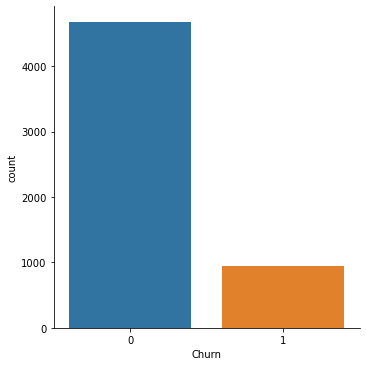

In [10]:
#count the number of customers in the churn and not churn class
sns.catplot(x='Churn', kind='count', data=data)
plt.show()

In [11]:
#create a function to display the relationship between categorical features and churn column
def plot_category_columns(column):
    sns.catplot(x=column, hue='Churn', kind='count', data=data)
    plt.title(f'Count of churn catagory for each {column}')
    plt.xticks(rotation=45)
    plt.show()

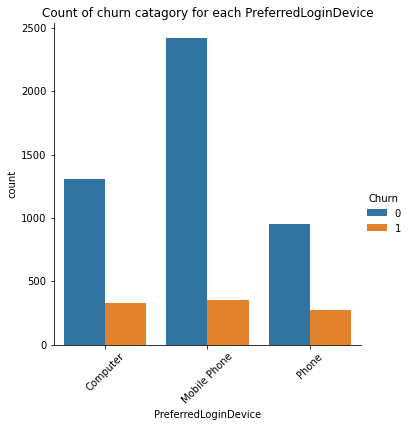

In [12]:
plot_category_columns('PreferredLoginDevice')

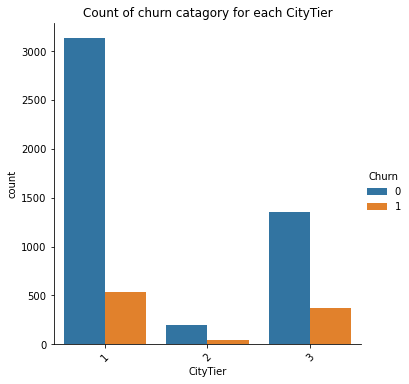

In [13]:
plot_category_columns('CityTier')

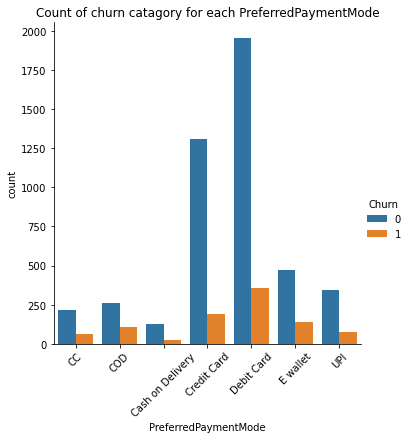

In [14]:
plot_category_columns('PreferredPaymentMode')

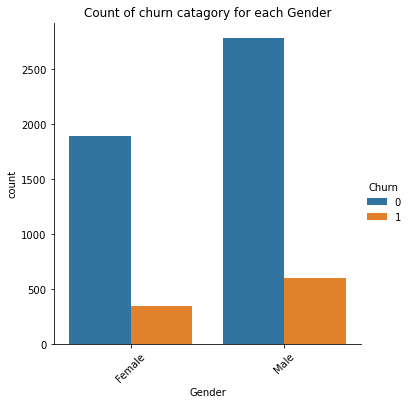

In [15]:
plot_category_columns('Gender')

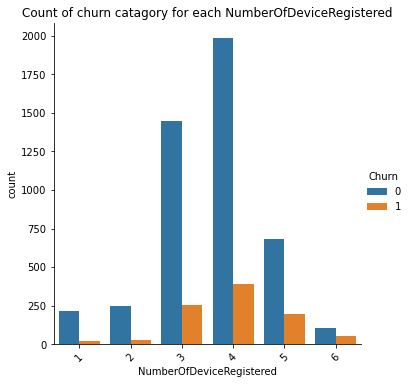

In [16]:
plot_category_columns('NumberOfDeviceRegistered')

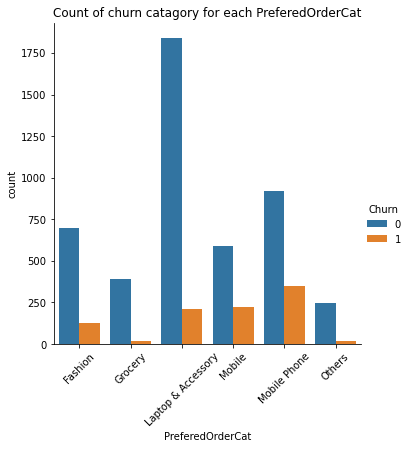

In [17]:
plot_category_columns('PreferedOrderCat')

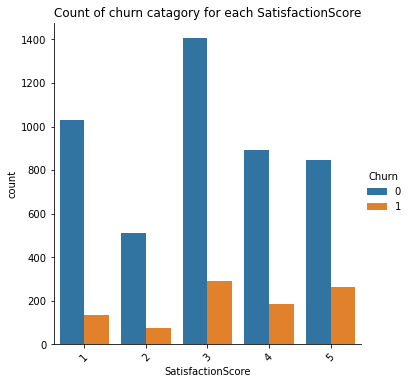

In [18]:
plot_category_columns('SatisfactionScore')

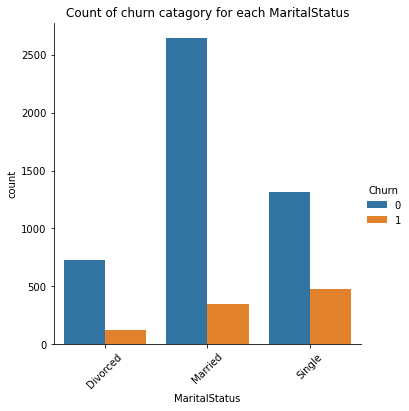

In [19]:
plot_category_columns('MaritalStatus')

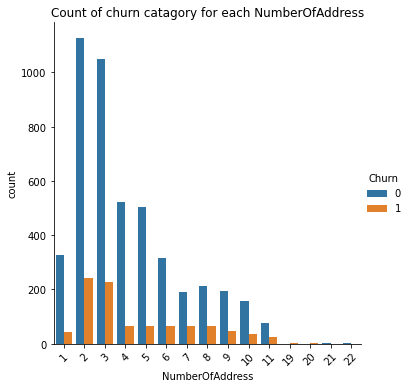

In [20]:
plot_category_columns('NumberOfAddress')

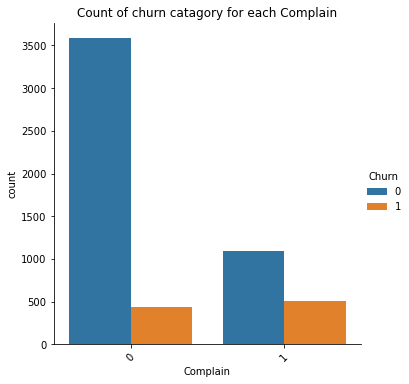

In [21]:
plot_category_columns('Complain')

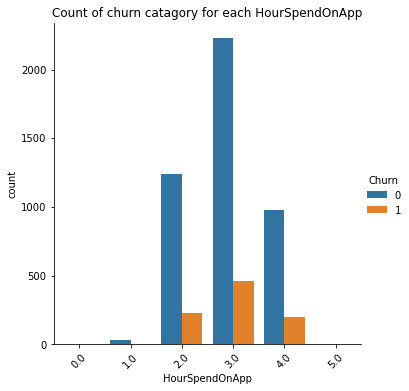

In [22]:
plot_category_columns('HourSpendOnApp')

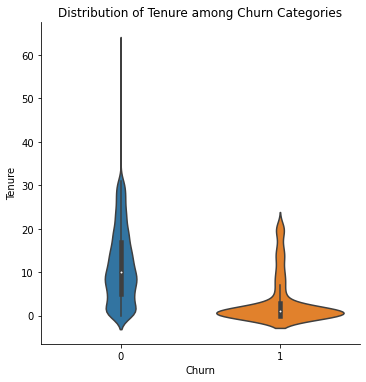

In [23]:
sns.catplot(x='Churn', y='Tenure', kind='violin', data=data)
plt.title("Distribution of Tenure among Churn Categories")
plt.show()

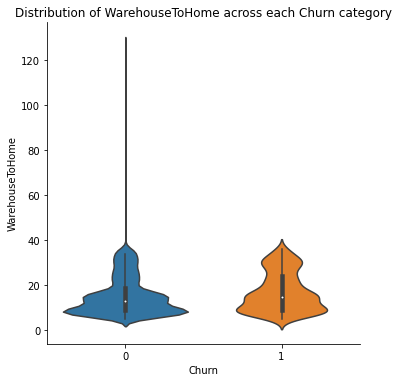

In [24]:
sns.catplot(y='WarehouseToHome', x='Churn', kind='violin', data=data)
plt.title("Distribution of WarehouseToHome across each Churn category")
plt.show()

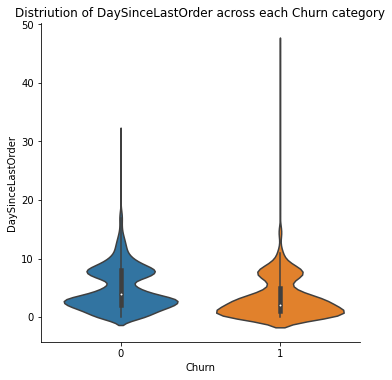

In [25]:
sns.catplot(x='Churn', y='DaySinceLastOrder', kind='violin', data=data)
plt.title("Distriution of DaySinceLastOrder across each Churn category")
plt.show()

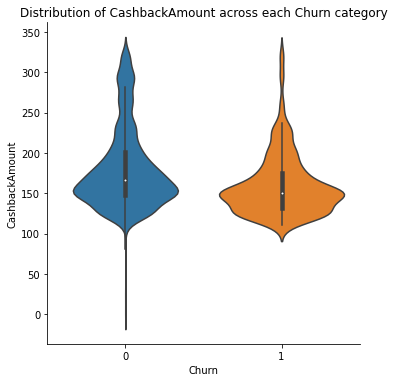

In [26]:
sns.catplot(x='Churn', y='CashbackAmount', kind='violin', data=data)
plt.title('Distribution of CashbackAmount across each Churn category')
plt.show()

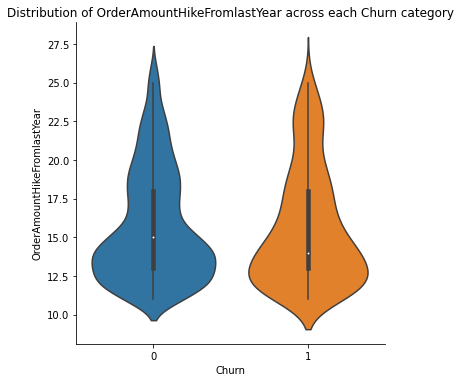

In [27]:
sns.catplot(x='Churn', y='OrderAmountHikeFromlastYear', kind='violin', data=data)
plt.title("Distribution of OrderAmountHikeFromlastYear across each Churn category")
plt.show()

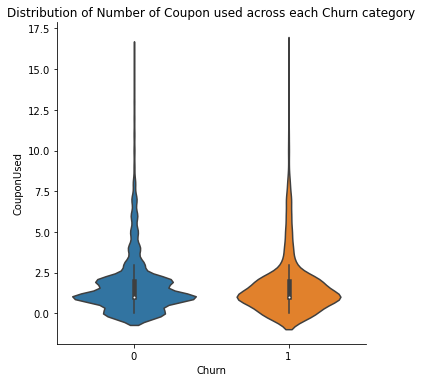

In [28]:
sns.catplot(x='Churn', y='CouponUsed', kind='violin', data=data)
plt.title("Distribution of Number of Coupon used across each Churn category")
plt.show()

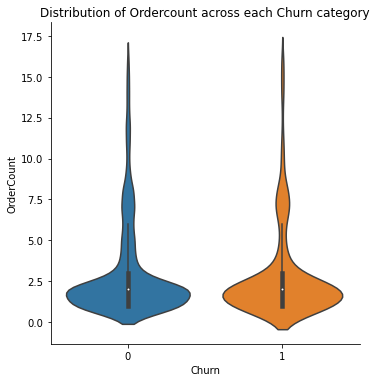

In [29]:
sns.catplot(x='Churn', y='OrderCount', kind='violin', data=data)
plt.title("Distribution of Ordercount across each Churn category")
plt.show()

**Findings and Conclusion**
--
From the Analysis, we can see that the churn rate is low.\
Mobile Phone order category has higher churn rate than other order category\
Single people have higher churn rate than other Marital Status\
Customers with complain have higher churn rate than people without complain\
Churned Customers had less tenure on the platform, mainly between 0 and 10\
Customers that didn't churn have more recent orders, they have less days since last order\
The cash spent on the platform has same distribution for both Churned and retained customers\
Percentage increase in orders, Coupon used, and order count also has same distribution for both Churned and retained customers\.